In [624]:
import pandas as pd 
import numpy as np
import seaborn as snas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")

In [625]:
concrete_df=pd.read_excel(r'C:\Users\Manas\Downloads\2nd Term\Interview\Concrete compressive strength\Concrete_Data.xlsx')

#### How big is the data

In [626]:
concrete_df.shape

(1030, 9)

#### How does the data look like

In [627]:
concrete_df.sample(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
330,246.83,0.0,125.08,143.3,11.99,1086.8,800.89,14,42.216615
1012,325.60,166.4,0.00,174.0,8.90,881.6,790.00,28,61.235811
837,374.00,0.0,0.00,190.0,7.00,1013.0,730.00,28,39.051921
971,312.70,144.7,0.00,127.3,8.00,999.7,822.20,28,44.523602
539,480.00,0.0,0.00,192.0,0.00,936.2,712.20,90,54.315540
64,266.00,114.0,0.00,228.0,0.00,932.0,670.00,180,48.695621
791,349.00,0.0,0.00,192.0,0.00,1047.0,806.00,180,41.051401
139,374.00,189.2,0.00,170.1,10.10,926.1,756.70,56,63.397318
871,159.00,187.0,0.00,176.0,11.00,990.0,789.00,28,32.763900
484,446.00,24.0,79.00,162.0,10.30,967.0,712.00,56,54.765079


####  Each row represents a specific concrete mixture, and the columns represent different components and properties of the concrete. 

#### what are the data types in the dataset

In [628]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

#### In summary, this DataFrame contains information about different components of concrete mixtures and their corresponding quantities, as well as additional data such as the age of the concrete and its compressive strength. It can be used for further analysis and modeling related to concrete properties and performance.

#### Now, let's Check for missing values and duplicate values.

In [629]:
concrete_df.duplicated().sum()

25

#### This shows we have 25 duplicate rows we need to  drop from our analysis.

In [630]:
concrete_df=concrete_df.drop_duplicates()

In [631]:
concrete_df.shape

(1005, 9)

In [632]:
concrete_df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

#### Hence, there are no missing values.

#### Basic numerical description of the data.

In [633]:
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1005.0,278.629055,104.345003,102.000000,190.680000,265.000000,349.00000,540.000000
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1005.0,72.043134,86.170555,0.000000,0.000000,20.000000,142.50000,359.400000
Fly Ash (component 3)(kg in a m^3 mixture),1005.0,55.535075,64.207448,0.000000,0.000000,0.000000,118.27000,200.100000
Water (component 4)(kg in a m^3 mixture),1005.0,182.074378,21.340740,121.750000,166.610000,185.700000,192.94000,247.000000
Superplasticizer (component 5)(kg in a m^3 mixture),1005.0,6.031647,5.919559,0.000000,0.000000,6.100000,10.00000,32.200000
Coarse Aggregate (component 6)(kg in a m^3 mixture),1005.0,974.376468,77.579534,801.000000,932.000000,968.000000,1031.00000,1145.000000
Fine Aggregate (component 7)(kg in a m^3 mixture),1005.0,772.686617,80.339851,594.000000,724.300000,780.000000,822.20000,992.600000
Age (day),1005.0,45.856716,63.734692,1.000000,7.000000,28.000000,56.00000,365.000000
"Concrete compressive strength(MPa, megapascals)",1005.0,35.250273,16.284808,2.331808,23.523542,33.798114,44.86834,82.599225


#### Check the correlaion between all the features wrt the target variable.

In [634]:
concrete_df.corr().T

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.303301,-0.385618,-0.056583,0.061296,-0.086212,-0.245379,0.086349,0.488283
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.303301,1.000000,-0.312342,0.130295,0.019902,-0.277558,-0.289676,-0.042759,0.103370
Fly Ash (component 3)(kg in a m^3 mixture),-0.385618,-0.312342,1.000000,-0.283372,0.414055,-0.026485,0.090229,-0.158940,-0.080648
Water (component 4)(kg in a m^3 mixture),-0.056583,0.130295,-0.283372,1.000000,-0.646875,-0.212495,-0.444888,0.279269,-0.269606
Superplasticizer (component 5)(kg in a m^3 mixture),0.061296,0.019902,0.414055,-0.646875,1.000000,-0.242031,0.207794,-0.194094,0.344225
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.086212,-0.277558,-0.026485,-0.212495,-0.242031,1.000000,-0.162212,-0.005263,-0.144710
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.245379,-0.289676,0.090229,-0.444888,0.207794,-0.162212,1.000000,-0.156572,-0.186457
Age (day),0.086349,-0.042759,-0.158940,0.279269,-0.194094,-0.005263,-0.156572,1.000000,0.337371
"Concrete compressive strength(MPa, megapascals)",0.488283,0.103370,-0.080648,-0.269606,0.344225,-0.144710,-0.186457,0.337371,1.000000


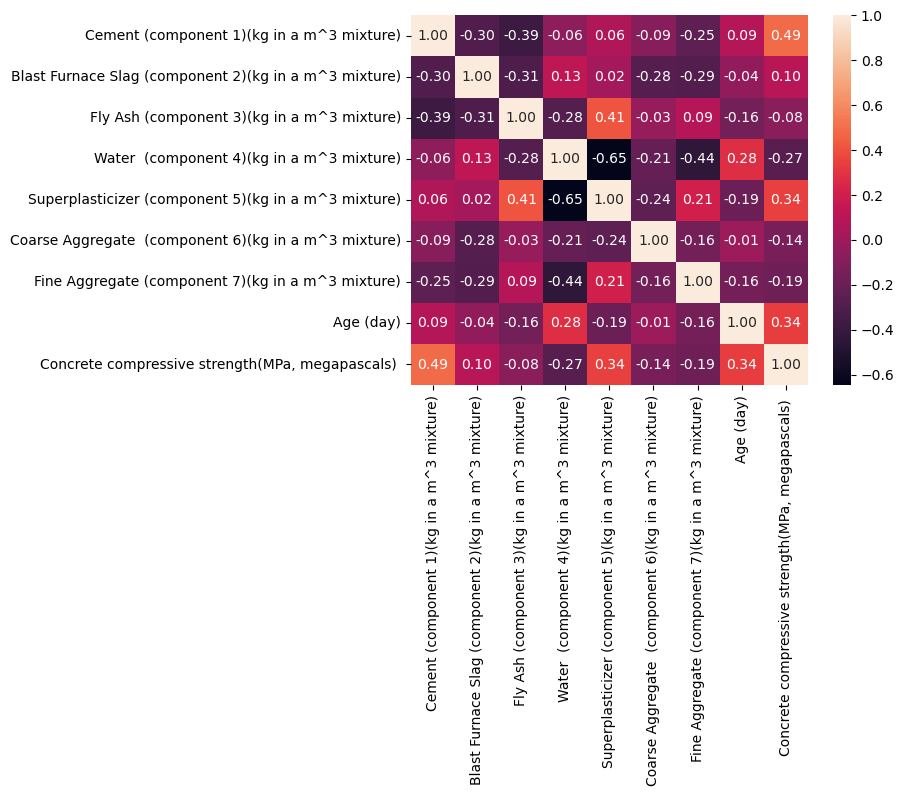

<Figure size 800x1000 with 0 Axes>

In [635]:
sns.heatmap(concrete_df.corr(),annot=True,fmt='0.2f')
plt.figure(figsize=(8,10))
plt.show()

## Exploratory Data Analysis

#### Before going forward, let's change the column names for ease of pandas dataframe handling


In [636]:
concrete_df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [637]:
new_column={'Cement (component 1)(kg in a m^3 mixture)' : 'Cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast furnace Slag',
       'Fly Ash (component 3)(kg in a m^3 mixture)' :'Fly Ash' ,
       'Water  (component 4)(kg in a m^3 mixture)':'Water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse Aggregate',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine Aggregate', 'Age (day)' : 'Age',
       'Concrete compressive strength(MPa, megapascals) ':'compressive strength'}

In [638]:
df=concrete_df.rename(columns=new_column)
df

,Cement,Blast furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


## Univariate Analysis

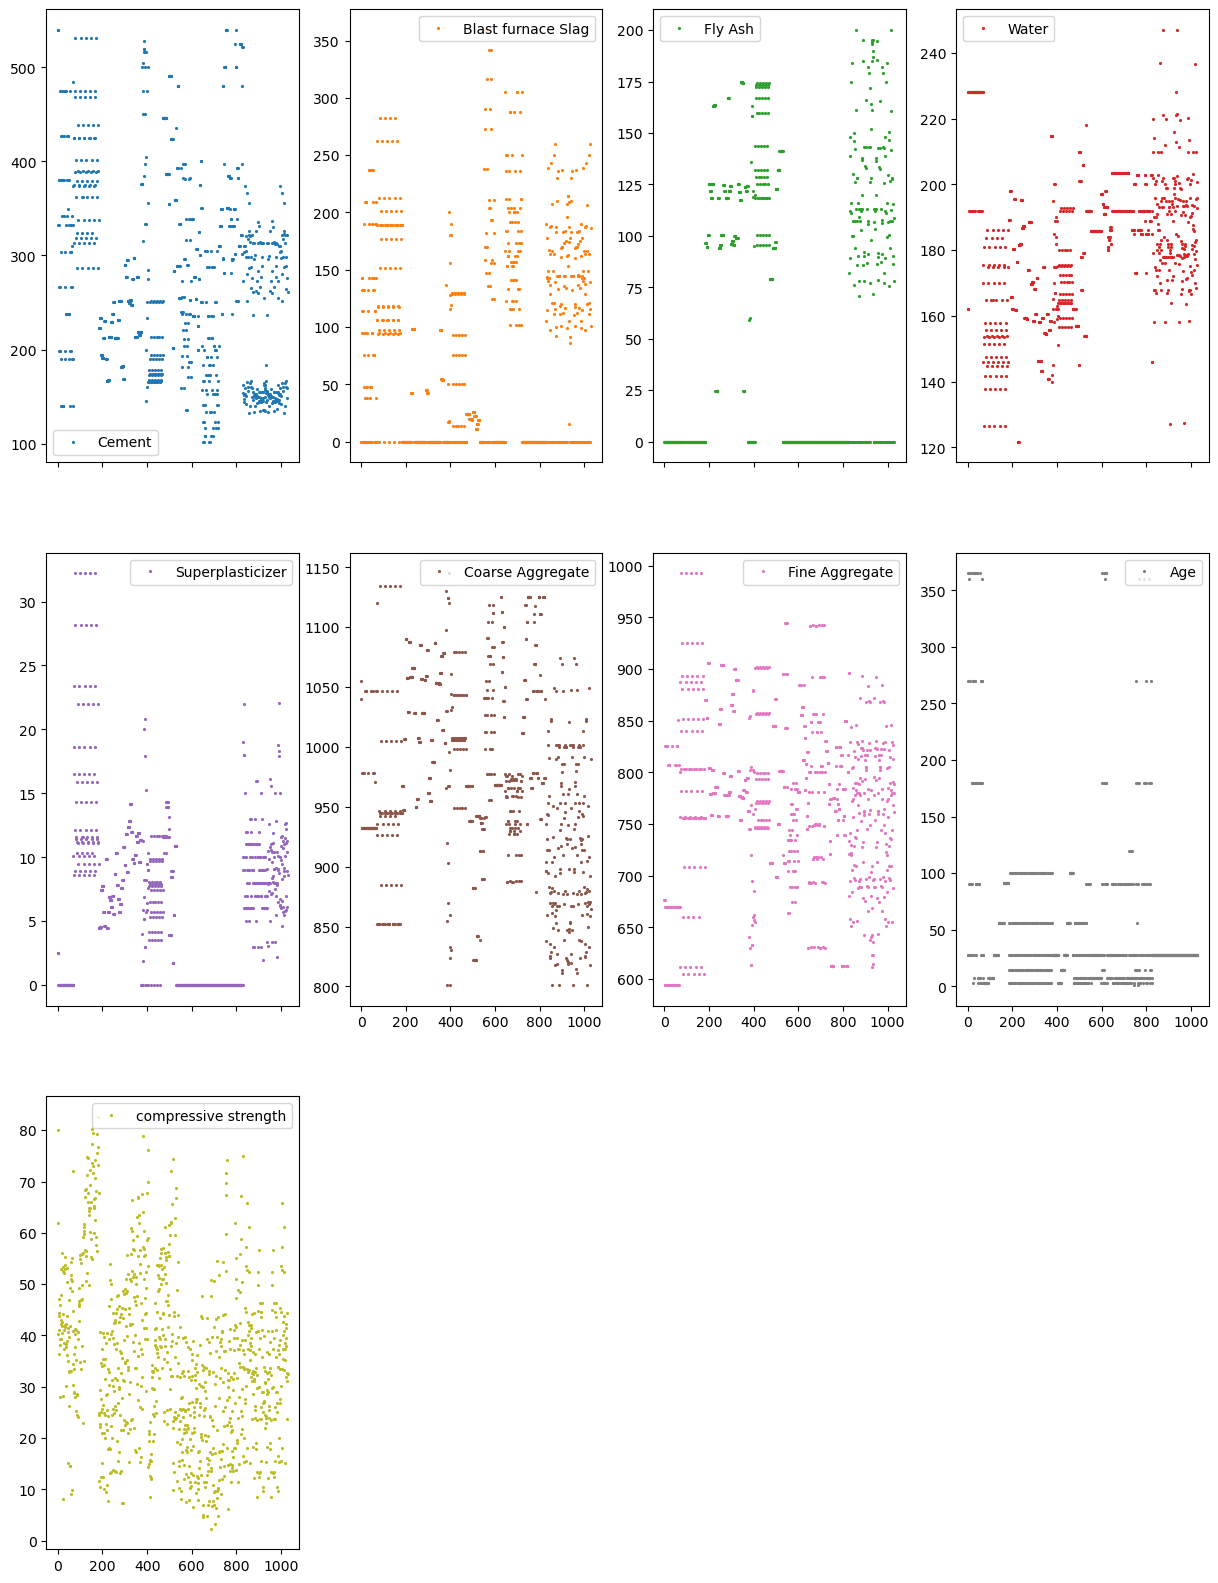

In [639]:
##Basic understanding of numerical data

df.plot(lw=0,marker='.',subplots=True,layout=(-1,4),figsize=(15,20),markersize=2.5)
plt.show()

### This does not give much clarity about data. Let's deep dive further.

## Cement

In [640]:
df.columns

Index(['Cement', 'Blast furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'compressive strength'],
      dtype='object')

In [641]:
## No of unique values in Cement
df['Cement'].nunique()

280

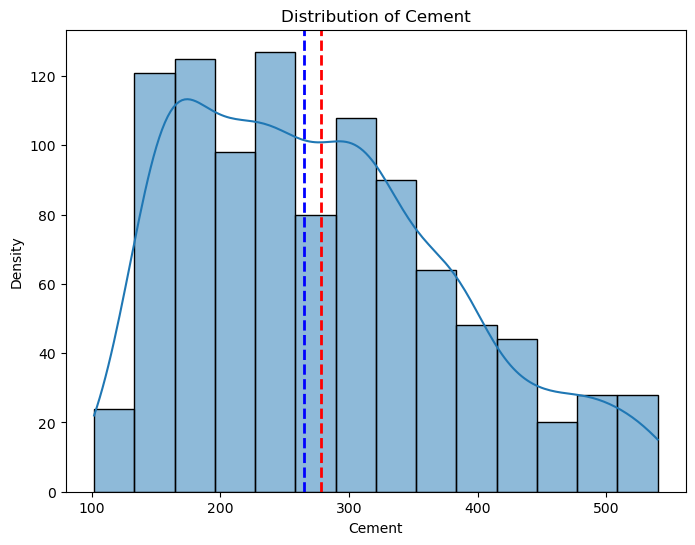

In [642]:
# Histogram of 'Cement'
plt.figure(figsize=(8, 6))
sns.histplot(df['Cement'], kde=True)
plt.xlabel('Cement')
plt.ylabel('Density')
plt.title('Distribution of Cement')


# Add vertical lines for mean and median
plt.axvline(df['Cement'].mean(), color='red', linestyle='dashed', linewidth=2) ## Red line is Mean.
plt.axvline(df['Cement'].median(), color='blue', linestyle='dashed', linewidth=2)

plt.show()

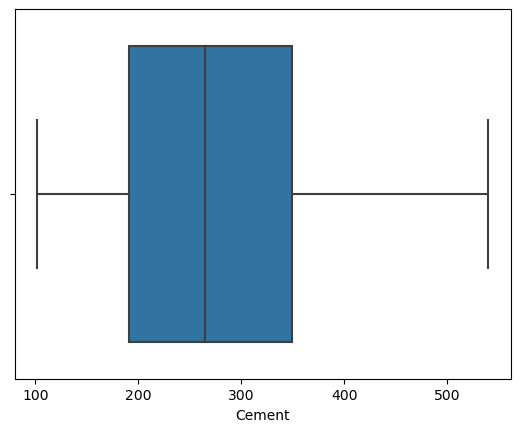

In [643]:
sns.boxplot(df['Cement'])
plt.show()

In [644]:
## Checking possible outliers

# Calculate the quartile values
q1 = df['Cement'].quantile(0.25)
q2 = df['Cement'].quantile(0.5)
q3 = df['Cement'].quantile(0.75)

# Calculate the whisker values
iqr = q3 - q1
whisker_lower = q1 - 1.5 * iqr
whisker_upper = q3 + 1.5 * iqr
print("Possible outlier's would any value below ",whisker_lower,'or any value above',whisker_upper)

Possible outlier's would any value below  -46.79999999999998 or any value above 586.48


In [645]:
df['Cement'].describe()

count    1005.000000
mean      278.629055
std       104.345003
min       102.000000
25%       190.680000
50%       265.000000
75%       349.000000
max       540.000000
Name: Cement, dtype: float64

### There are clearly no outliers.

In [646]:
df.columns

Index(['Cement', 'Blast furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'compressive strength'],
      dtype='object')

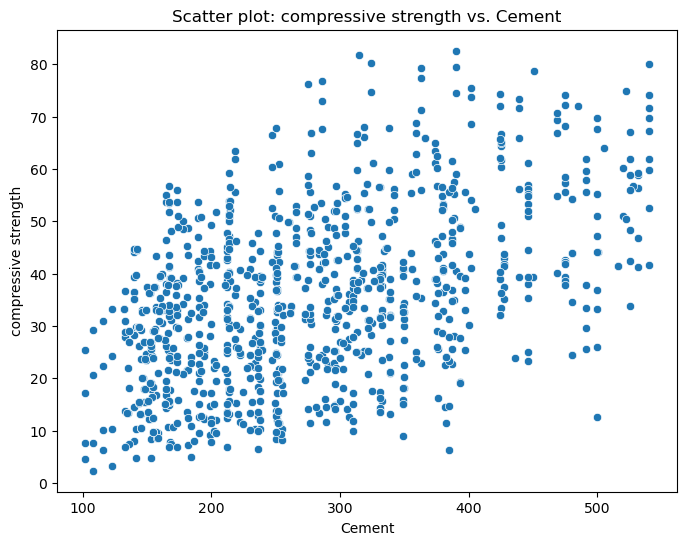

In [647]:
# Scatter plot of 'Cement' vs. 'compressive strength'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Cement'], y=df['compressive strength'])
plt.xlabel('Cement')
plt.ylabel('compressive strength')
plt.title('Scatter plot: compressive strength vs. Cement')
plt.show()

### There seems to be a positive linear relationship between Cement and compressive strength

In [648]:
df['Cement'].corr(df['compressive strength']) ## Correlation Coefficient 

0.48828306801652677

## Blast furnace Slag

In [649]:
df['Blast furnace Slag'].nunique()

187

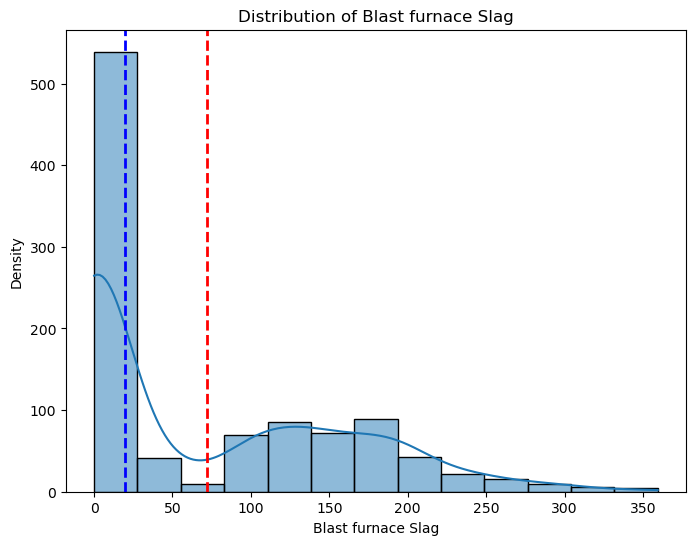

In [650]:
# Histogram of 'Blast furnace Slag'
plt.figure(figsize=(8, 6))
sns.histplot(df['Blast furnace Slag'], kde=True)
plt.xlabel('Blast furnace Slag')
plt.ylabel('Density')
plt.title('Distribution of Blast furnace Slag')


# Add vertical lines for mean and median
plt.axvline(df['Blast furnace Slag'].mean(), color='red', linestyle='dashed', linewidth=2) ## Red line is Mean.
plt.axvline(df['Blast furnace Slag'].median(), color='blue', linestyle='dashed', linewidth=2)

plt.show()

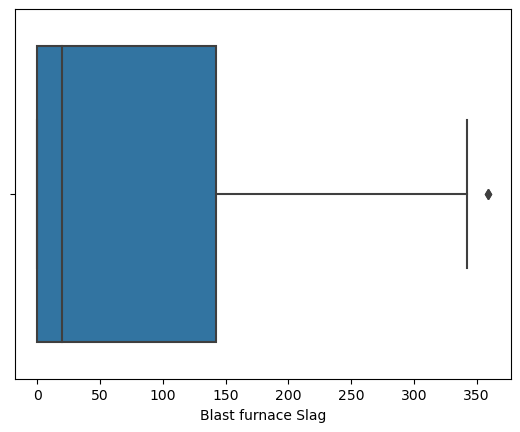

In [651]:
## Boxplot of Blast furnace Slag
sns.boxplot(df['Blast furnace Slag'])
plt.show()

In [652]:
## Checking possible outliers

# Calculate the quartile values
q1 = df['Blast furnace Slag'].quantile(0.25)
q2 = df['Blast furnace Slag'].quantile(0.5)
q3 = df['Blast furnace Slag'].quantile(0.75)

# Calculate the whisker values
iqr = q3 - q1
whisker_lower = q1 - 1.5 * iqr
whisker_upper = q3 + 1.5 * iqr
print("Possible outlier's would any value below ",whisker_lower,'or any value above',whisker_upper)


Possible outlier's would any value below  -213.75 or any value above 356.25


In [653]:
df[df['Blast furnace Slag']>whisker_upper]

,Cement,Blast furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,compressive strength
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.422359
559,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.435269


### There seems to be two extreme values. But from domain knowledge, I will not be removing these values.

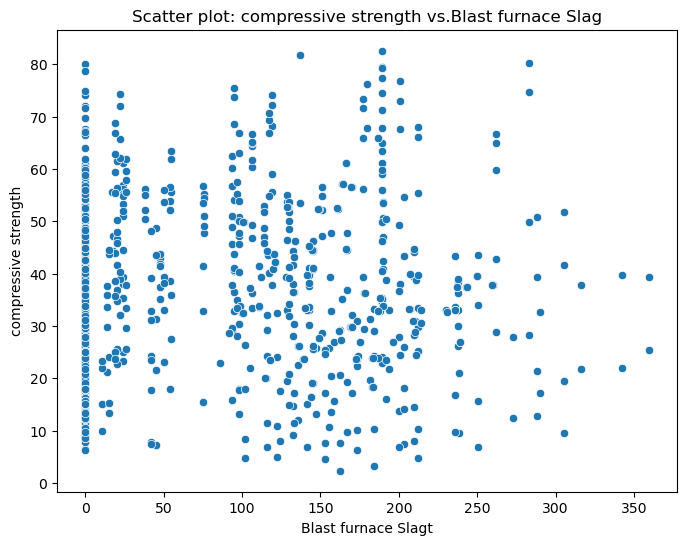

In [654]:
# Scatter plot of 'Blast furnace Slag' vs. 'compressive strength'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Blast furnace Slag'], y=df['compressive strength'])
plt.xlabel('Blast furnace Slagt')
plt.ylabel('compressive strength')
plt.title('Scatter plot: compressive strength vs.Blast furnace Slag')
plt.show()

### There seems to be no particular linear relationship between Blast furnace Slag and compressive strength

In [655]:
df['Blast furnace Slag'].corr(df['compressive strength']) ## Correlation coefficient.

0.10337039529981937

## Fly Ash

In [656]:
df['Fly Ash'].nunique()

163

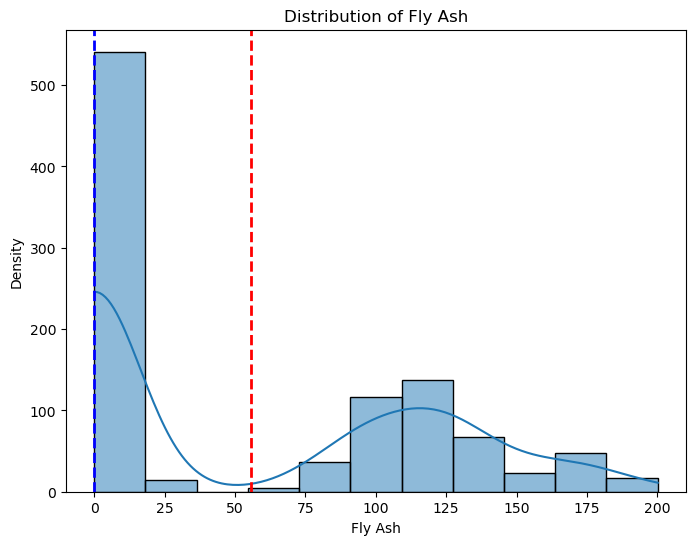

In [657]:
# Histogram of 'Fly Ash'
plt.figure(figsize=(8, 6))
sns.histplot(df['Fly Ash'], kde=True)
plt.xlabel('Fly Ash')
plt.ylabel('Density')
plt.title('Distribution of Fly Ash')


# Add vertical lines for mean and median
plt.axvline(df['Fly Ash'].mean(), color='red', linestyle='dashed', linewidth=2) ## Red line is Mean.
plt.axvline(df['Fly Ash'].median(), color='blue', linestyle='dashed', linewidth=2)

plt.show()

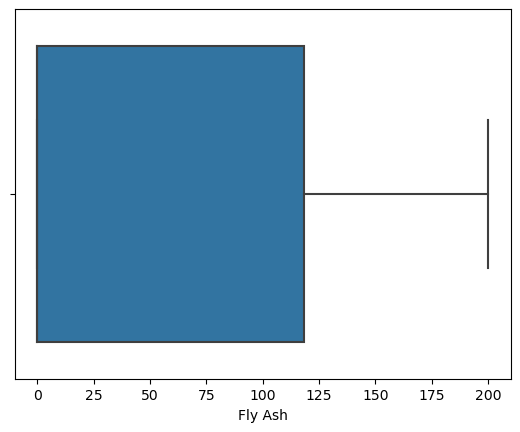

In [658]:
## Boxplot of Fly Ash
sns.boxplot(df['Fly Ash'])
plt.show()

In [659]:
## Checking possible outliers

# Calculate the quartile values
q1 = df['Fly Ash'].quantile(0.25)
q2 = df['Fly Ash'].quantile(0.5)
q3 = df['Fly Ash'].quantile(0.75)

# Calculate the whisker values
iqr = q3 - q1
whisker_lower = q1 - 1.5 * iqr
whisker_upper = q3 + 1.5 * iqr
print("Possible outlier's would any value below ",whisker_lower,'or any value above',whisker_upper)

Possible outlier's would any value below  -177.405 or any value above 295.675


In [660]:
df['Fly Ash'].describe()

count    1005.000000
mean       55.535075
std        64.207448
min         0.000000
25%         0.000000
50%         0.000000
75%       118.270000
max       200.100000
Name: Fly Ash, dtype: float64

### Thus, there are clearly no outliers.

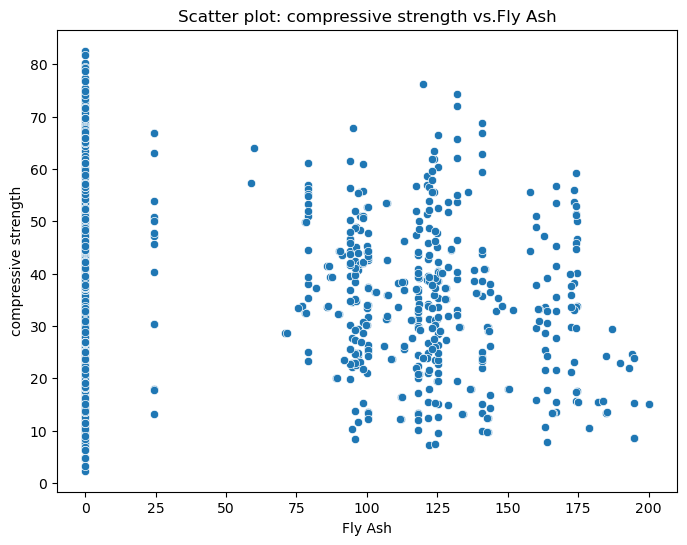

In [661]:
# Scatter plot of 'Fly Ash' vs. 'compressive strength'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Fly Ash'], y=df['compressive strength'])
plt.xlabel('Fly Ash')
plt.ylabel('compressive strength')
plt.title('Scatter plot: compressive strength vs.Fly Ash')
plt.show()

### There seems to be no clear relationship between Fly Ash and Compressive Strength

In [662]:
df['Fly Ash'].corr(df['compressive strength']) ## correlation coefficient

-0.0806475967617497

## Water

In [663]:
df['Water'].nunique()

205

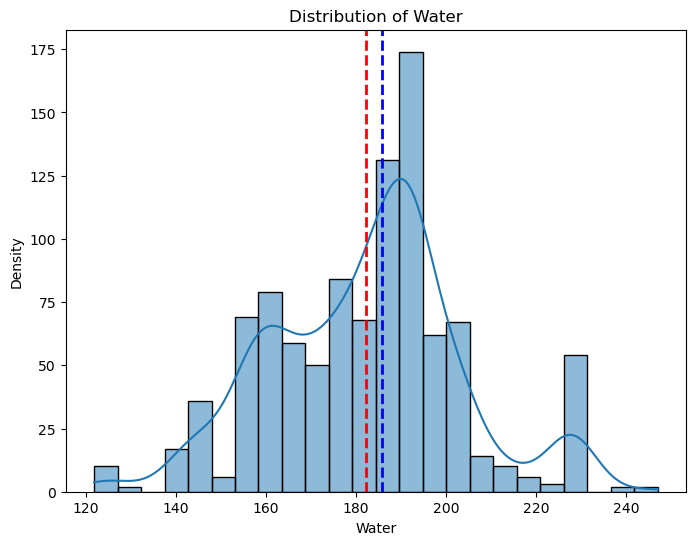

In [664]:
# Histogram of 'Water'
plt.figure(figsize=(8, 6))
sns.histplot(df['Water'], kde=True)
plt.xlabel('Water')
plt.ylabel('Density')
plt.title('Distribution of Water')


# Add vertical lines for mean and median
plt.axvline(df['Water'].mean(), color='red', linestyle='dashed', linewidth=2) ## Red line is Mean.
plt.axvline(df['Water'].median(), color='blue', linestyle='dashed', linewidth=2)

plt.show()

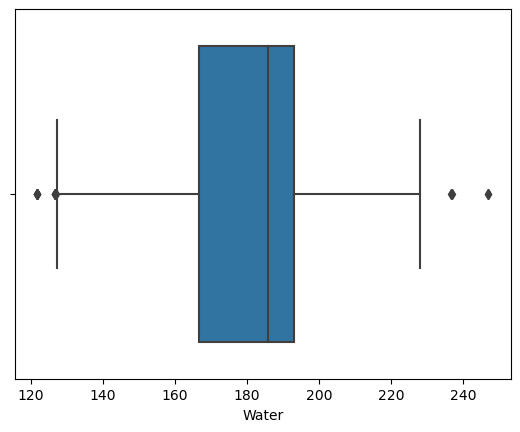

In [665]:
## Boxplot of Fly Ash
sns.boxplot(df['Water'])
plt.show()

In [666]:
## Checking possible outliers

# Calculate the quartile values
q1 = df['Water'].quantile(0.25)
q2 = df['Water'].quantile(0.5)
q3 = df['Water'].quantile(0.75)

# Calculate the whisker values
iqr = q3 - q1
whisker_lower = q1 - 1.5 * iqr
whisker_upper = q3 + 1.5 * iqr
print("Possible outlier's would any value below ",whisker_lower,'or any value above',whisker_upper)

Possible outlier's would any value below  127.11500000000004 or any value above 232.43499999999997


In [667]:
df[(df['Water'] < whisker_lower) | (df['Water'] > whisker_upper)]

,Cement,Blast furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,compressive strength
74,375.00,93.80,0.00,126.60,23.40,852.1,992.60,3,28.999361
97,375.00,93.80,0.00,126.60,23.40,852.1,992.60,7,45.698469
120,375.00,93.80,0.00,126.60,23.40,852.1,992.60,28,56.695611
143,375.00,93.80,0.00,126.60,23.40,852.1,992.60,56,60.198150
166,375.00,93.80,0.00,126.60,23.40,852.1,992.60,91,62.500999
224,167.95,42.08,163.83,121.75,5.72,1058.7,780.11,3,7.749710
225,167.95,42.08,163.83,121.75,5.72,1058.7,780.11,14,17.822955
226,167.95,42.08,163.83,121.75,5.72,1058.7,780.11,28,24.241976
227,167.95,42.08,163.83,121.75,5.72,1058.7,780.11,56,32.853531
228,167.95,42.08,163.83,121.75,5.72,1058.7,780.11,100,39.231184


In [668]:
df[(df['Water'] < whisker_lower) | (df['Water'] > whisker_upper)].groupby('Cement')['Age'].value_counts()

Cement  Age
139.70  28     1
140.00  28     1
167.95  3      1
        14     1
        28     1
        56     1
        100    1
236.90  28     1
237.00  28     1
313.00  28     1
375.00  3      1
        7      1
        28     1
        56     1
        91     1
Name: Age, dtype: int64

### There seems to be outliers. 

In [669]:
## Here, I will be dropping only two values, with water content around 247 kg/m3.
df=df[df['Water']<246]

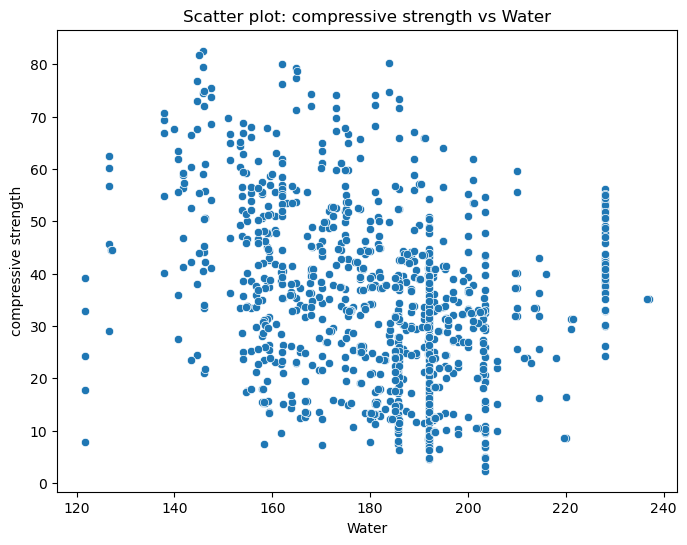

In [670]:
# Scatter plot of 'Water' vs. 'compressive strength'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Water'], y=df['compressive strength'])
plt.xlabel('Water')
plt.ylabel('compressive strength')
plt.title('Scatter plot: compressive strength vs Water')
plt.show()

### There seems to be slight negative relationship between water and compressive strength

In [671]:
df['Water'].corr(df['compressive strength']) 

-0.2696816505044408

## Superplasticizer

In [672]:
df['Superplasticizer'].nunique()

155

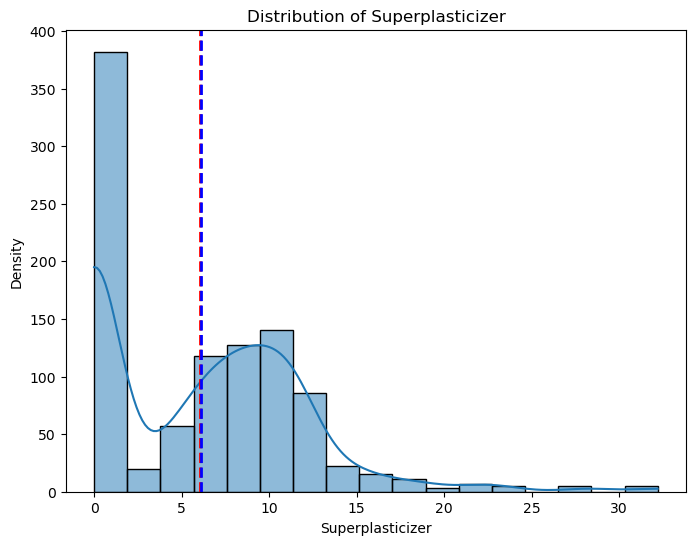

In [673]:
# Histogram of 'Superplasticizer'
plt.figure(figsize=(8, 6))
sns.histplot(df['Superplasticizer'], kde=True)
plt.xlabel('Superplasticizer')
plt.ylabel('Density')
plt.title('Distribution of Superplasticizer')


# Add vertical lines for mean and median
plt.axvline(df['Superplasticizer'].mean(), color='red', linestyle='dashed', linewidth=2) ## Red line is Mean.
plt.axvline(df['Superplasticizer'].median(), color='blue', linestyle='dashed', linewidth=2)

plt.show()

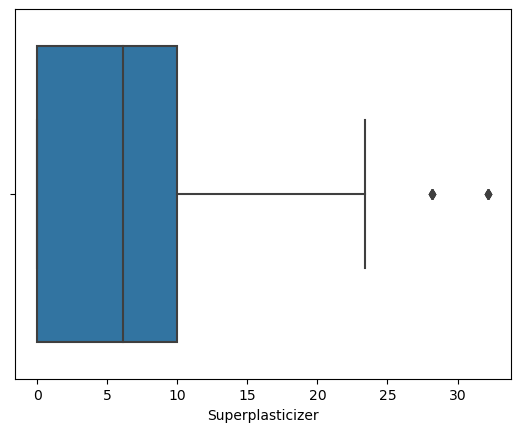

In [674]:
## Boxplot of Fly Ash
sns.boxplot(df['Superplasticizer'])
plt.show()

In [675]:
## Checking possible outliers

# Calculate the quartile values
q1 = df['Superplasticizer'].quantile(0.25)
q2 = df['Superplasticizer'].quantile(0.5)
q3 = df['Superplasticizer'].quantile(0.75)

# Calculate the whisker values
iqr = q3 - q1
whisker_lower = q1 - 1.5 * iqr
whisker_upper = q3 + 1.5 * iqr
print("Possible outlier's would any value below ",whisker_lower,'or any value above',whisker_upper)

Possible outlier's would any value below  -15.0 or any value above 25.0


In [676]:
df[(df['Superplasticizer']<whisker_lower) | (df['Superplasticizer']>whisker_upper)]

,Cement,Blast furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,compressive strength
76,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.196451
79,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.299612
99,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.896079
102,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.898158
122,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.899856
125,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.399137
145,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.299233
148,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.798513
168,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.698869
171,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.198409


In [677]:
df[(df['Superplasticizer']<whisker_lower) | (df['Superplasticizer']>whisker_upper)].groupby('Cement')['Age'].value_counts()

Cement  Age
469.0   3      1
        7      1
        28     1
        56     1
        91     1
531.3   3      1
        7      1
        28     1
        56     1
        91     1
Name: Age, dtype: int64

In [678]:
### In essence there are two instances of concrete which slightly higher value. But, I will be removing only the higher one
df=df[df['Superplasticizer']<32]

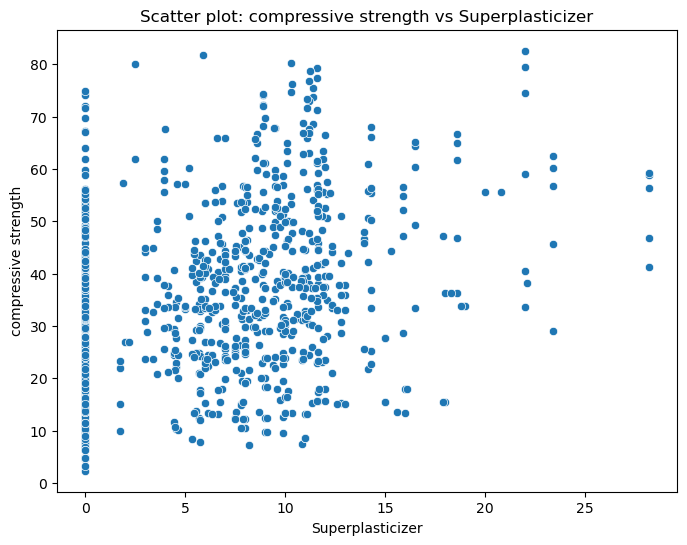

In [679]:
# Scatter plot of 'Superplasticizer' vs. 'compressive strength'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Superplasticizer'], y=df['compressive strength'])
plt.xlabel('Superplasticizer')
plt.ylabel('compressive strength')
plt.title('Scatter plot: compressive strength vs Superplasticizer')
plt.show()

### There is a slight positive relationship between Superplasticizer and compressive stength

In [680]:
df['Superplasticizer'].corr(df['compressive strength'])


0.32888226203652104

## Coarse Aggregate

In [681]:
df['Coarse Aggregate'].nunique()

282

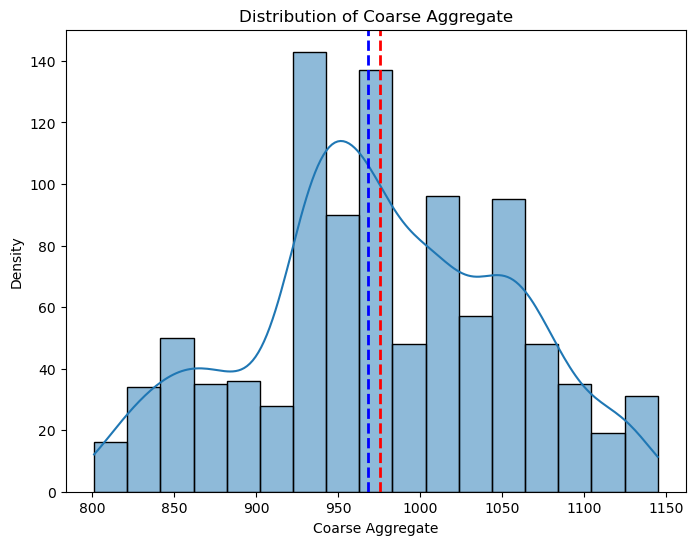

In [682]:
# Histogram of 'Coarse Aggregate'
plt.figure(figsize=(8, 6))
sns.histplot(df['Coarse Aggregate'], kde=True)
plt.xlabel('Coarse Aggregate')
plt.ylabel('Density')
plt.title('Distribution of Coarse Aggregate')


# Add vertical lines for mean and median
plt.axvline(df['Coarse Aggregate'].mean(), color='red', linestyle='dashed', linewidth=2) ## Red line is Mean.
plt.axvline(df['Coarse Aggregate'].median(), color='blue', linestyle='dashed', linewidth=2)

plt.show()

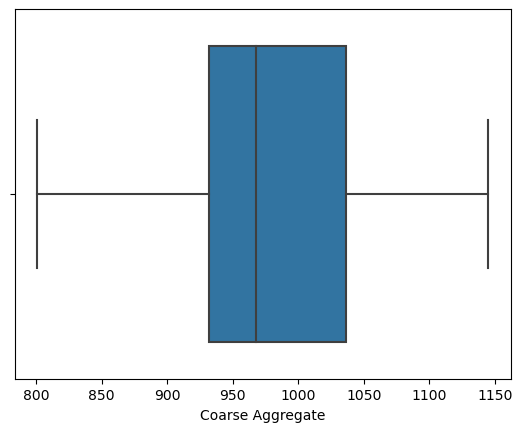

In [683]:
## Boxplot of Coarse Aggregate
sns.boxplot(df['Coarse Aggregate'])
plt.show()

In [684]:
## Checking possible outliers

# Calculate the quartile values
q1 = df['Coarse Aggregate'].quantile(0.25)
q2 = df['Coarse Aggregate'].quantile(0.5)
q3 = df['Coarse Aggregate'].quantile(0.75)

# Calculate the whisker values
iqr = q3 - q1
whisker_lower = q1 - 1.5 * iqr
whisker_upper = q3 + 1.5 * iqr
print("Possible outlier's would any value below ",whisker_lower,'or any value above',whisker_upper)

Possible outlier's would any value below  774.875 or any value above 1193.875


In [685]:
df['Coarse Aggregate'].describe()

count     998.000000
mean      975.232415
std        77.172193
min       801.000000
25%       932.000000
50%       968.000000
75%      1036.750000
max      1145.000000
Name: Coarse Aggregate, dtype: float64

### Clearly, there are no outlier's 

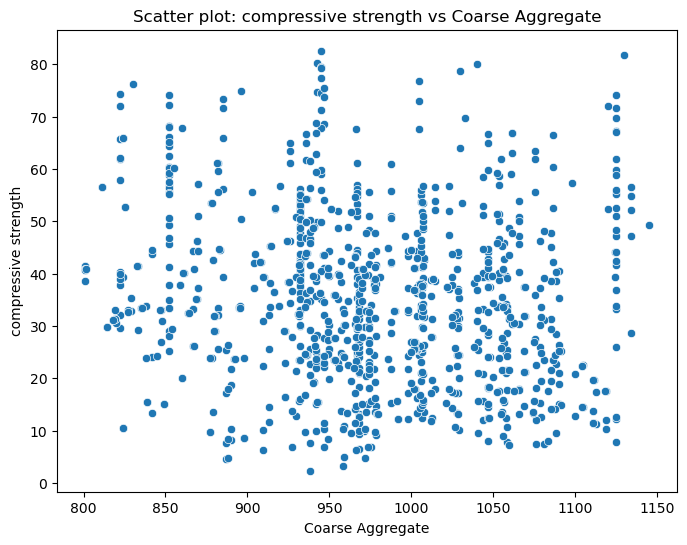

In [686]:
# Scatter plot of 'Coarse Aggregate' vs. 'compressive strength'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Coarse Aggregate'], y=df['compressive strength'])
plt.xlabel('Coarse Aggregate')
plt.ylabel('compressive strength')
plt.title('Scatter plot: compressive strength vs Coarse Aggregate')
plt.show()

### There seems to be no linear positive relationship between Course Aggregate and compressive strength.

In [687]:
df['Coarse Aggregate'].corr(df['compressive strength'])

-0.1359650499315045

In [688]:
df.columns

Index(['Cement', 'Blast furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'compressive strength'],
      dtype='object')

## Fine Aggregate 

In [689]:
df['Fine Aggregate'].nunique()

302

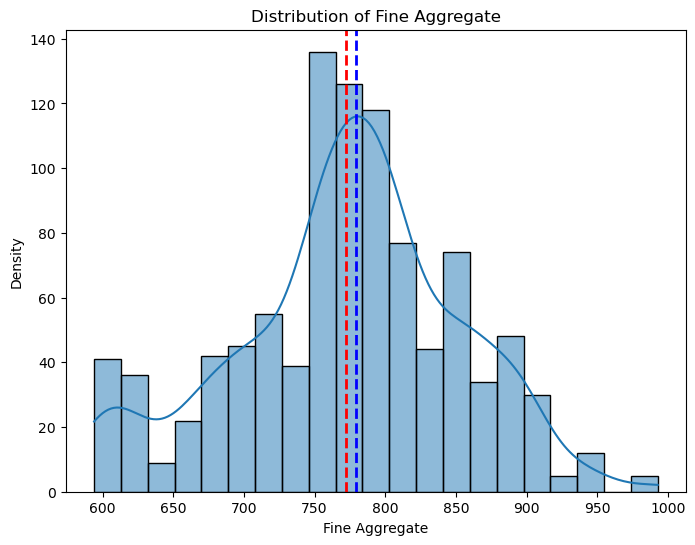

In [690]:
# Histogram of 'Fine Aggregate'
plt.figure(figsize=(8, 6))
sns.histplot(df['Fine Aggregate'], kde=True)
plt.xlabel('Fine Aggregate')
plt.ylabel('Density')
plt.title('Distribution of Fine Aggregate')


# Add vertical lines for mean and median
plt.axvline(df['Fine Aggregate'].mean(), color='red', linestyle='dashed', linewidth=2) ## Red line is Mean.
plt.axvline(df['Fine Aggregate'].median(), color='blue', linestyle='dashed', linewidth=2)

plt.show()

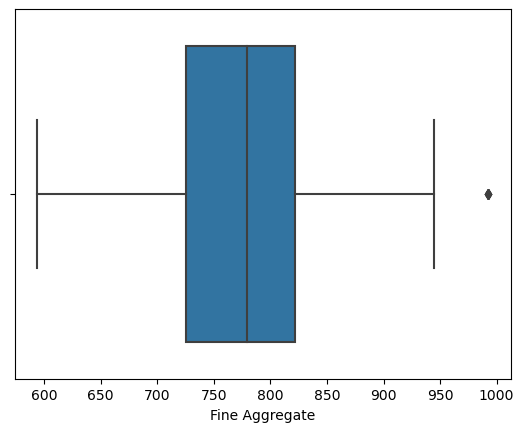

In [691]:
## Boxplot of Fine Aggregate
sns.boxplot(df['Fine Aggregate'])
plt.show()

In [692]:
## Checking possible outliers

# Calculate the quartile values
q1 = df['Fine Aggregate'].quantile(0.25)
q2 = df['Fine Aggregate'].quantile(0.5)
q3 = df['Fine Aggregate'].quantile(0.75)

# Calculate the whisker values
iqr = q3 - q1
whisker_lower = q1 - 1.5 * iqr
whisker_upper = q3 + 1.5 * iqr
print("Possible outlier's would any value below ",whisker_lower,'or any value above',whisker_upper)

Possible outlier's would any value below  579.8125 or any value above 967.3125


In [693]:
df[(df['Fine Aggregate']<whisker_lower) | (df['Fine Aggregate']>whisker_upper)].groupby('Cement')['Age'].value_counts()

Cement  Age
375.0   3      1
        7      1
        28     1
        56     1
        91     1
Name: Age, dtype: int64

In [694]:
df[(df['Fine Aggregate']<whisker_lower) | (df['Fine Aggregate']>whisker_upper)]

,Cement,Blast furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,compressive strength
74,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,28.999361
97,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.698469
120,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.695611
143,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.198150
166,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.500999


In [695]:
### In essence there is one concrete mix which is an outlier. Dropping that.
df=df[df['Fine Aggregate']<whisker_upper]

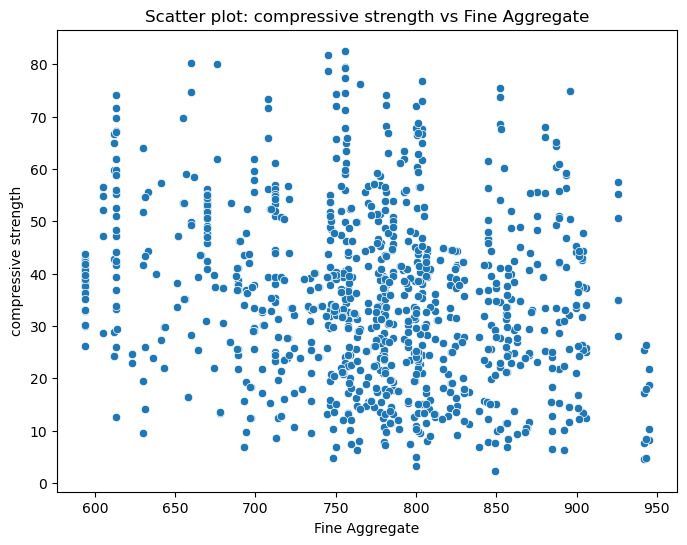

In [696]:
# Scatter plot of 'Fine Aggregate' vs. 'compressive strength'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Fine Aggregate'], y=df['compressive strength'])
plt.xlabel('Fine Aggregate')
plt.ylabel('compressive strength')
plt.title('Scatter plot: compressive strength vs Fine Aggregate')
plt.show()

### There seems to be no clear relationship between Fine Aggregate and compressive strength

In [697]:
df['Fine Aggregate'].corr(df['compressive strength'])

-0.21393831699198665

## Age

In [698]:
df['Age'].nunique()

14

In [699]:
df['Age'].value_counts()

28     415
3      127
7      120
56      84
14      62
90      54
100     52
180     26
91      15
365     14
270     13
360      6
120      3
1        2
Name: Age, dtype: int64

In [700]:
df[df["Age"]==1]

,Cement,Blast furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,compressive strength
746,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,1,12.638095
763,385.0,0.0,0.0,186.0,0.0,966.0,763.0,1,6.267337


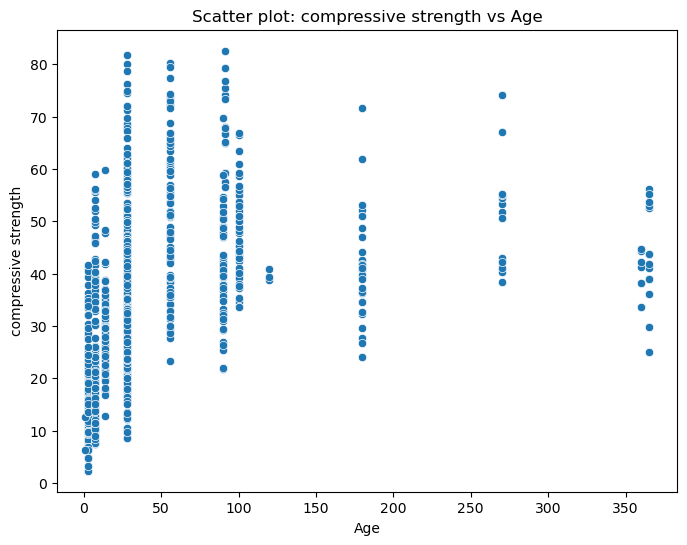

In [701]:
# Scatter plot of 'Age' vs. 'compressive strength'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['compressive strength'])
plt.xlabel('Age')
plt.ylabel('compressive strength')
plt.title('Scatter plot: compressive strength vs Age')
plt.show()

### As age increases , compressive strength also increases.

In [702]:
df['Age'].corr(df['compressive strength'])

0.34016699470148465

## Target Variable - compressive strength

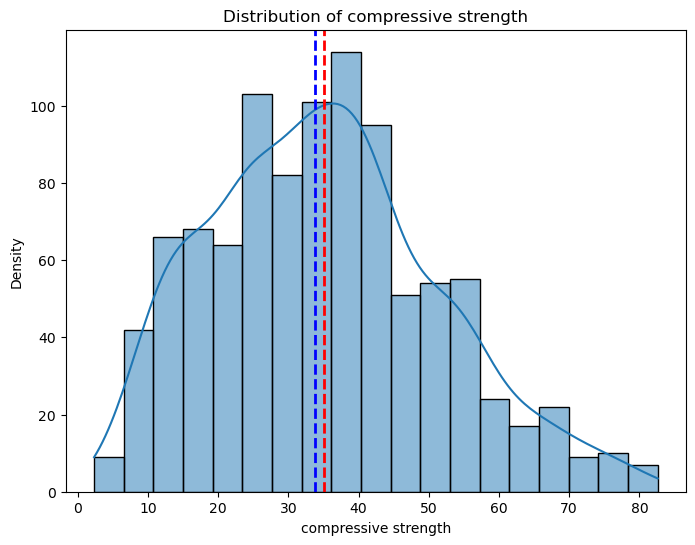

In [703]:
# Histogram of 'compressive strength'
plt.figure(figsize=(8, 6))
sns.histplot(df['compressive strength'], kde=True)
plt.xlabel('compressive strength')
plt.ylabel('Density')
plt.title('Distribution of compressive strength')


# Add vertical lines for mean and median
plt.axvline(df['compressive strength'].mean(), color='red', linestyle='dashed', linewidth=2) ## Red line is Mean.
plt.axvline(df['compressive strength'].median(), color='blue', linestyle='dashed', linewidth=2)

plt.show()

### Check for multicollinearity

In [704]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_1= add_constant(df)
df_1

,const,Cement,Blast furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,compressive strength
0,1.0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,1.0,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,1.0,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,1.0,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,1.0,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...,...
1025,1.0,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,1.0,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,1.0,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,1.0,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [705]:
vif=[]
for i in range(df_1.shape[1]):
    vif.append(variance_inflation_factor(df_1.values,i))
vif

[6584.328546391867,
 8.7071531926743,
 7.955183431810085,
 6.417879235097175,
 6.577741125729989,
 2.848974179228996,
 4.8337916492201165,
 6.730481193803953,
 1.6237766656923764,
 2.516120585183185]

In [706]:
pd.Series(vif,index=df_1.columns)

const                   6584.328546
Cement                     8.707153
Blast furnace Slag         7.955183
Fly Ash                    6.417879
Water                      6.577741
Superplasticizer           2.848974
Coarse Aggregate           4.833792
Fine Aggregate             6.730481
Age                        1.623777
compressive strength       2.516121
dtype: float64

### Clearly, there are few features which have VIF between 5-10.


### We have looked at VIF , and found out multicollinearity does exist in some of these features . 
### To address the issue, there can be two approaches we can take;
### 1. Subset Selection 
### 2. Dimensional Reduction.

In [707]:
## Features 

X=df.drop('compressive strength',axis=1)

In [708]:
## Target

y=df['compressive strength']

### Subset Selection using stepwise regression

In [709]:
## getting column names
x_columns = ['Cement', 'Blast furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age']

In [710]:
## creating function to get model statistics
def get_stats():
    x = df[x_columns]
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    import statsmodels.api as sm
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    X_train_scaled=StandardScaler().fit_transform(X_train)
    X_train_scaled=sm.add_constant(X_train_scaled)
    
    results = sm.OLS(y_train, X_train_scaled).fit()
    print(results.summary())
get_stats()

                             OLS Regression Results                             
Dep. Variable:     compressive strength   R-squared:                       0.586
Model:                              OLS   Adj. R-squared:                  0.582
Method:                   Least Squares   F-statistic:                     138.9
Date:                  Thu, 29 Jun 2023   Prob (F-statistic):          9.09e-145
Time:                          18:54:04   Log-Likelihood:                -2987.9
No. Observations:                   794   AIC:                             5994.
Df Residuals:                       785   BIC:                             6036.
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.8464      0.372

In [711]:
### p-value insignificant for x6, ie 'course aggregate' let's drop this and find out OLS regression.
x_columns.remove('Coarse Aggregate')
get_stats()

                             OLS Regression Results                             
Dep. Variable:     compressive strength   R-squared:                       0.585
Model:                              OLS   Adj. R-squared:                  0.582
Method:                   Least Squares   F-statistic:                     158.5
Date:                  Thu, 29 Jun 2023   Prob (F-statistic):          1.35e-145
Time:                          18:54:05   Log-Likelihood:                -2988.6
No. Observations:                   794   AIC:                             5993.
Df Residuals:                       786   BIC:                             6031.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.8464      0.372

In [712]:
### We can see that x6 is statistically insignificant, so let's drop'Fine Aggregates' and check the OLS summary.
x_columns.remove('Fine Aggregate')
get_stats()

                             OLS Regression Results                             
Dep. Variable:     compressive strength   R-squared:                       0.585
Model:                              OLS   Adj. R-squared:                  0.581
Method:                   Least Squares   F-statistic:                     184.6
Date:                  Thu, 29 Jun 2023   Prob (F-statistic):          1.95e-146
Time:                          18:54:05   Log-Likelihood:                -2989.3
No. Observations:                   794   AIC:                             5993.
Df Residuals:                       787   BIC:                             6025.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.8464      0.372

## Thus we find after **Stepwise Regression**,The prediction of concrete compressive strength is explained by the following features only:

1.'Cement', 

2.'Blast furnace Slag', 

3.'Fly Ash',

4.'Water', 

5.'Superplasticizer',

6.'Age'

In [713]:
## Train Test Split 

X=df.drop(['Coarse Aggregate','Fine Aggregate','compressive strength'],axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [714]:

scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Regression with standardised coefficients

In [715]:
model=LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)

In [716]:
r2=r2_score(y_test,y_pred)
rmse=mean_squared_error(y_pred,y_test,squared=False)

print('r2 score',r2)
print('root mean square error',rmse)

# Calculate the adjusted R-squared
n = X_test_scaled.shape[0]  # number of samples
p = X_test_scaled.shape[1]  # number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r2)

r2 score 0.6618313044449875
root mean square error 9.370987944604265
Adjusted R-squared: 0.6512635327088934


#### Checking the residuals.

In [717]:
Residuals =y_pred-y_test

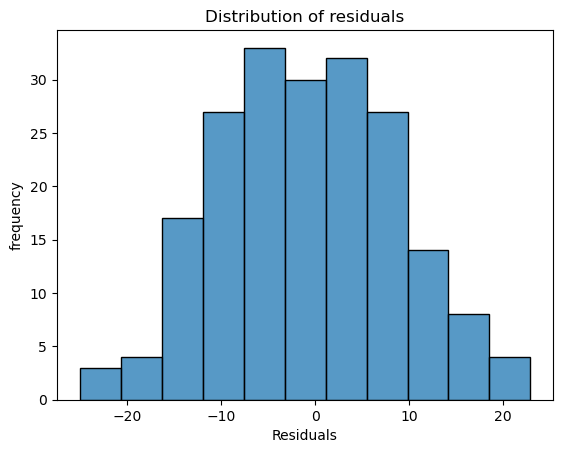

In [718]:
sns.histplot(data=Residuals)
plt.xlabel('Residuals')
plt.ylabel('frequency')
plt.title('Distribution of residuals')
plt.show()

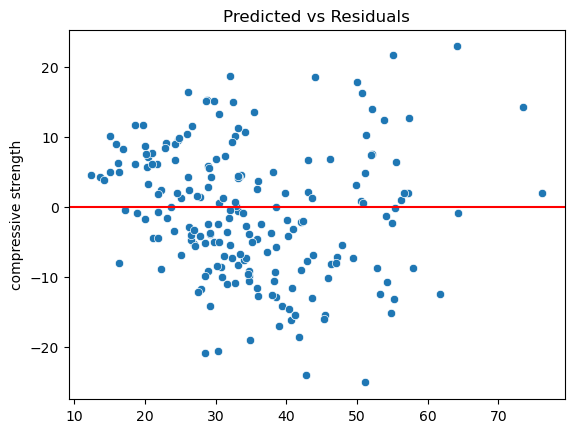

In [719]:
### Scatter PLot
sns.scatterplot(y_pred,Residuals)
plt.axhline(y=0,color='r',linestyle='-')
plt.title('Predicted vs Residuals')
plt.show()

### There is clearly a pattern in residual plot, the residuals seem to be heteroskedastic.

In [720]:


# Perform the Breusch-Pagan test
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(Residuals, X_test_scaled)

# Print the p-value of the Breusch-Pagan test
print("Breusch-Pagan test p-value: ", lm_pvalue)

if lm_pvalue < 0.05:
    print("The null hypothesis is rejected. There is evidence of heteroskedasticity.")
else:
    print("The null hypothesis is not rejected. There is no significant evidence of heteroskedasticity.")
    

Breusch-Pagan test p-value:  0.002449017381509518
The null hypothesis is rejected. There is evidence of heteroskedasticity.


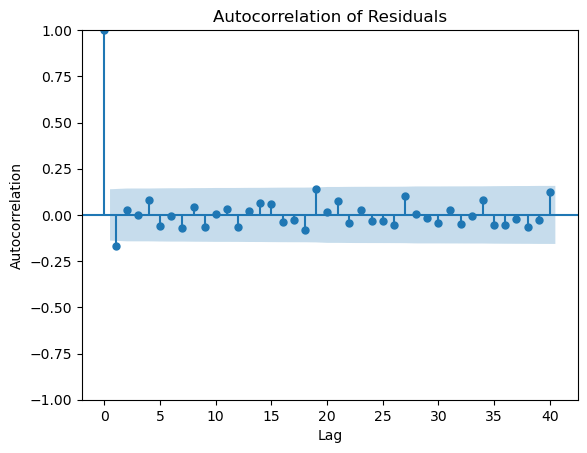

In [721]:
# Plot the autocorrelation of residuals
sm.graphics.tsa.plot_acf(Residuals, lags=40)

# Set plot title and labels
plt.title('Autocorrelation of Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

# Display the plot
plt.show()

In [722]:
# Perform the Durbin-Watson test
durbin_watson_statistic = sm.stats.stattools.durbin_watson(Residuals)

# Print the Durbin-Watson test statistic
print("Durbin-Watson test statistic:", durbin_watson_statistic)

Durbin-Watson test statistic: 2.315869108082547


### A Durbin-Watson statistic away from value of 2, means there is auto-correlaion amongst the Residuals.

In [723]:
# Checking if residual is normal or not.

stat, p_value = stats.shapiro(Residuals)

alpha = 0.05  # Set significance level
if p_value > alpha:
    print("Residuals follow a normal distribution.")
else:
    print("Residuals do not follow a normal distribution.")


Residuals follow a normal distribution.


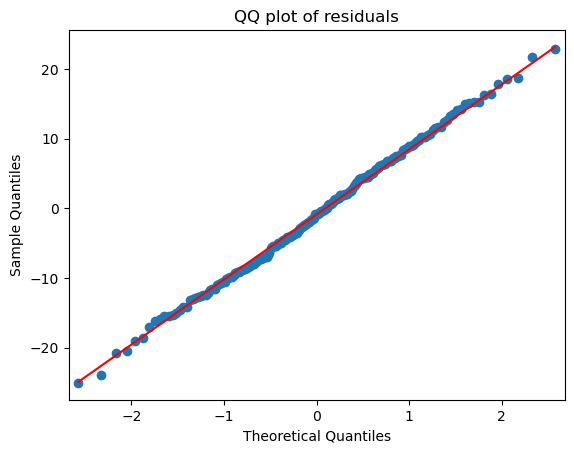

In [724]:
sm.qqplot(Residuals,line='s')
plt.title('QQ plot of residuals')
plt.show()


### 1. The residuals follow normal distribution.
### 2. There is slight auto-correlation in the residuals.
### 3. There is also heteroskedasticity in the residuals.
Consequences: First, the ordinary least squares estimators are still linear and unbiased, but are no longer best; there is another form that produces smaller variances. Second, the standard errors may be misleading and incorrectly, which can affect interval estimation and hypothesis testing.

### Our model does not follow all the assumptions of OLS.


### Since, the adjusted r-square value comes out be 0.65 , it means that around 65 % of variation in the compressive strength is explained by the predictor variables in the model.

In [725]:
### Applying polynomial regression to check for better results.


poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

# Add a column of ones for the intercept term
X_train_poly = sm.add_constant(X_train_poly)

# Fit the polynomial regression model
model = sm.OLS(y_train, X_train_poly)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     compressive strength   R-squared:                       0.774
Model:                              OLS   Adj. R-squared:                  0.766
Method:                   Least Squares   F-statistic:                     96.98
Date:                  Thu, 29 Jun 2023   Prob (F-statistic):          4.23e-226
Time:                          18:54:06   Log-Likelihood:                -2748.3
No. Observations:                   794   AIC:                             5553.
Df Residuals:                       766   BIC:                             5683.
Df Model:                            27                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.0251      0.780     53.887      0.000      40.494      43.556
x1            11.2033      0.474     23.613      0.000      10.272      12.135
x2             7.6038      0.546     13.927      0.000       6.532       8.676
x3             3.5253      0.703      5.015      0.000       2.145       4.905
x4            -3.7874      0.464     -8.167      0.000      -4.698      -2.877
x5             3.1248      0.695      4.495      0.000       1.760       4.490
x6            19.1582      0.643     29.784      0.000      17.895      20.421
x7            -0.9522      0.436     -2.184      0.029      -1.808      -0.096
x8            -1.2298      0.781     -1.575      0.116      -2.763       0.303
x9            -0.1764      0.733     -0.241      0.810      -1.614       1.262
x10           -2.0235      0.662     -3.056      0.002      -3.323      -0.724
x11           -1.0214      0.787     -1.299      0.194      -2.565       0.523
x12           -0.4681      0.461     -1.016      0.310      -1.373       0.437
x13           -1.4279      0.474     -3.010      0.003      -2.359      -0.497
x14           -0.5513      0.807     -0.683      0.495      -2.135       1.033
x15           -0.1683      0.665     -0.253      0.800      -1.473       1.137
x16            0.4149      0.737      0.563      0.574      -1.033       1.862
x17            0.6597      0.500      1.321      0.187      -0.321       1.640
x18           -0.4840      0.687     -0.705      0.481      -1.832       0.864
x19           -0.7820      0.713     -1.097      0.273      -2.181       0.617
x20           -1.3529      0.879     -1.539      0.124      -3.079       0.373
x21            0.5912      0.859      0.688      0.492      -1.096       2.278
x22            0.3914      0.285      1.371      0.171      -0.169       0.952
x23            0.0635      0.623      0.102      0.919      -1.159       1.286
x24           -0.1959      0.484     -0.405      0.686      -1.146       0.755
x25           -1.3423      0.462     -2.904      0.004      -2.250      -0.435
x26            3.3482      0.882      3.798      0.000       1.618       5.079
x27           -2.6407      0.204    -12.927      0.000      -3.042      -2.240
==============================================================================
Omnibus:                       15.916   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.093
Skew:                           0.133   Prob(JB):                     2.16e-06
Kurtosis:                       3.847   Cond. No.                         30.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [726]:
# Get the names of the polynomial features
feature_names = poly_features.get_feature_names(input_features=X.columns)

# Print the original names of the columns
for idx, name in enumerate(feature_names):
    print(f"Polynomial Feature {idx}: {name}")

Polynomial Feature 0: 1
Polynomial Feature 1: Cement
Polynomial Feature 2: Blast furnace Slag
Polynomial Feature 3: Fly Ash
Polynomial Feature 4: Water
Polynomial Feature 5: Superplasticizer
Polynomial Feature 6: Age
Polynomial Feature 7: Cement^2
Polynomial Feature 8: Cement Blast furnace Slag
Polynomial Feature 9: Cement Fly Ash
Polynomial Feature 10: Cement Water
Polynomial Feature 11: Cement Superplasticizer
Polynomial Feature 12: Cement Age
Polynomial Feature 13: Blast furnace Slag^2
Polynomial Feature 14: Blast furnace Slag Fly Ash
Polynomial Feature 15: Blast furnace Slag Water
Polynomial Feature 16: Blast furnace Slag Superplasticizer
Polynomial Feature 17: Blast furnace Slag Age
Polynomial Feature 18: Fly Ash^2
Polynomial Feature 19: Fly Ash Water
Polynomial Feature 20: Fly Ash Superplasticizer
Polynomial Feature 21: Fly Ash Age
Polynomial Feature 22: Water^2
Polynomial Feature 23: Water Superplasticizer
Polynomial Feature 24: Water Age
Polynomial Feature 25: Superplasticizer^

In [727]:
# Get the names of the polynomial features
feature_names = poly_features.get_feature_names(input_features=X.columns)

# Create a DataFrame from the polynomial features
poly_df = pd.DataFrame(X_train_poly, columns=feature_names)
poly_df

,1,Cement,Blast furnace Slag,Fly Ash,Water,Superplasticizer,Age,Cement^2,Cement Blast furnace Slag,Cement Fly Ash,...,Fly Ash^2,Fly Ash Water,Fly Ash Superplasticizer,Fly Ash Age,Water^2,Water Superplasticizer,Water Age,Superplasticizer^2,Superplasticizer Age,Age^2
0,1.0,-1.201275,0.857319,0.887862,-0.192515,0.398491,-0.273508,1.443060,-1.029875,-1.066566,...,0.788298,-0.170927,0.353805,-0.242837,0.037062,-0.076715,0.052654,0.158795,-0.108990,0.074807
1,1.0,0.057040,0.564429,-0.870273,-0.679260,0.253557,-0.273508,0.003254,0.032195,-0.049641,...,0.757375,0.591142,-0.220664,0.238027,0.461394,-0.172231,0.185783,0.064291,-0.069350,0.074807
2,1.0,-0.404374,0.996239,-0.870273,0.451706,-1.050847,-0.273508,0.163518,-0.402853,0.351916,...,0.757375,-0.393108,0.914524,0.238027,0.204038,-0.474674,-0.123545,1.104280,0.287415,0.074807
3,1.0,0.191619,-0.821299,0.794509,-0.884456,1.304327,-0.273508,0.036718,-0.157377,0.152243,...,0.631245,-0.702709,1.036300,-0.217305,0.782262,-1.153620,0.241906,1.701270,-0.356744,0.074807
4,1.0,-1.235881,1.910796,-0.870273,-0.321359,1.231860,-0.273508,1.527401,-2.361515,1.075554,...,0.757375,0.279670,-1.072055,0.238027,0.103272,-0.395870,0.087894,1.517480,-0.336924,0.074807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,1.0,1.412444,0.409301,-0.870273,-1.485729,2.318864,-0.273508,1.994999,0.578115,-1.229213,...,0.757375,1.292990,-2.018045,0.238027,2.207390,-3.445203,0.406359,5.377130,-0.634228,0.074807
790,1.0,-0.009769,-0.821299,0.644990,-1.046704,1.092362,-0.659401,0.000095,0.008023,-0.006301,...,0.416012,-0.675114,0.704562,-0.425307,1.095590,-1.143379,0.690198,1.193254,-0.720304,0.434810
791,1.0,0.335811,1.042545,-0.870273,-0.216375,0.760825,-0.273508,0.112769,0.350099,-0.292248,...,0.757375,0.188305,-0.662126,0.238027,0.046818,-0.164624,0.059180,0.578855,-0.208092,0.074807
792,1.0,-0.801575,-0.821299,0.693689,-0.590023,0.304284,0.837865,0.642522,0.658332,-0.556043,...,0.481204,-0.409292,0.211078,0.581217,0.348127,-0.179535,-0.494359,0.092589,0.254949,0.702017


In [728]:
poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, y_train)

LinearRegression()

In [729]:
y_pred = poly_regression.predict(X_test_poly)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred,squared =False)
mse=mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)
print(" Mean Squared Error:", mse)

R-squared: 0.7943777524624064
Root Mean Squared Error: 7.307246012903833
 Mean Squared Error: 53.39584429309896


### Using Lasso for feature selection

In [730]:
# Step 4: Initialize and Fit the Lasso Regression Model

lasso = Lasso(alpha=0.1,fit_intercept=False)  # Set the regularization strength (alpha)
lasso.fit(poly_df, y_train)

# Step 5: Evaluate the Model
y_pred = lasso.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)

# Calculate the adjusted R-squared
n = X_test_scaled.shape[0]  # number of samples
p = X_test_scaled.shape[1]  # number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)


rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)

Root Mean Squared Error: 7.4143473907667286
R-squared: 0.788306021486407
Adjusted R-squared: 0.7816905846578572


In [731]:
# Get the coefficients of the features
feature_coef = dict(zip(poly_df.columns, lasso.coef_))
feature_coef

{'1': 40.10671927209596,
 'Cement': 10.2872744501593,
 'Blast furnace Slag': 6.569951619545273,
 'Fly Ash': 2.282834819536106,
 'Water': -3.7835551144165596,
 'Superplasticizer': 3.5970273230407046,
 'Age': 18.286535577799427,
 'Cement^2': -0.15106446940610635,
 'Cement Blast furnace Slag': -0.3200685926385954,
 'Cement Fly Ash': 0.0,
 'Cement Water': -1.298445284564671,
 'Cement Superplasticizer': -0.2750877807252215,
 'Cement Age': -0.6572982523337733,
 'Blast furnace Slag^2': -0.6173239630957474,
 'Blast furnace Slag Fly Ash': -0.0,
 'Blast furnace Slag Water': 0.0,
 'Blast furnace Slag Superplasticizer': 0.44062741136501954,
 'Blast furnace Slag Age': 0.40350448039058323,
 'Fly Ash^2': -0.0,
 'Fly Ash Water': -0.12042046414780448,
 'Fly Ash Superplasticizer': -0.5469128211748997,
 'Fly Ash Age': 0.0,
 'Water^2': 0.5774789484918499,
 'Water Superplasticizer': -0.0,
 'Water Age': -0.020029044737748452,
 'Superplasticizer^2': -1.6789016408193287,
 'Superplasticizer Age': 3.05713976424

In [732]:
important_features = [feature for feature, coef in feature_coef.items() if coef != 0.0]
print(important_features)

['1', 'Cement', 'Blast furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Age', 'Cement^2', 'Cement Blast furnace Slag', 'Cement Water', 'Cement Superplasticizer', 'Cement Age', 'Blast furnace Slag^2', 'Blast furnace Slag Superplasticizer', 'Blast furnace Slag Age', 'Fly Ash Water', 'Fly Ash Superplasticizer', 'Water^2', 'Water Age', 'Superplasticizer^2', 'Superplasticizer Age', 'Age^2']


In [733]:
len(important_features)

22

## Inferences

### 1. We could see the lowest value of RMSE and MSE comes out with polynomial regression. 

### 2. The concrete compressive strength can best be described by the 22 features we have derived. We can conclude almost 78 percent variation in compressive strength has been explained by these 22 features.

### 3. We could have got better results with other models, but purpose of this project, is to understand the factors which affect concrete's compressive strength most.

### 4. Course Aggregate and Fine Aggregate are indeed key-ingredients of concrete but as such they do not play a statistically significant role in concrete's strength.